<a href="https://colab.research.google.com/github/clementbowe14/ml-class/blob/main/labs/Working_version_of_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Clustering


## Supervised vs Unsupervised learning

Up until now we have been focusing on supervised learning. In supervised learning our training set consists of labeled data. For example, we have images and each image has an associated  label: dog, cat, elephant. And from this labeled data our model is trying to learn how to predict the label from the features. 

Unsupervised learning is trying to learn patterns from unlabeled data, and one set of models has to do with segmenting a dataset into clusters or groups of related data.

![](https://cambridge-intelligence.com/wp-content/uploads/2016/01/clustering-animated.gif)


In clustering the system divides a set of instances into clusters or groups
based on some measure of similarity. There are two main types of clustering algorithms.

### k-means clustering
For one type, we tell the algorithm how many clusters to make. Please cluster these 1,000
people into 5 groups. Please classify these web pages into 15 groups. These methods go by
the name of k-means clustering algorithms and we will discuss those a bit later.


### hierarchical clustering
For the other approach we don’t specify how many clusters to make. Instead the algorithm
starts with each instance in its own cluster. At each iteration of the algorithm it combines the
two most similar clusters into one. It repeatedly does this until there is only one cluster. This is called hierarchical clustering and its name makes sense. The running of the algorithm
results in one cluster, which consists of two sub-clusters. Each of those two sub-clusters in
turn, consist of 2 sub-sub clusters and so on. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/hierarchicalClustering1.png)


Again, at each iteration of the algorithm we join the two closest clusters. To determine the
‘closest clusters’ we use a distance formula. But we have some choices in how we compute
the distance between two clusters, which leads to different clustering methods. Consider the
three clusters (A, B, and C) illustrated below each containing two members. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/hierarchicalClustering2.png)




Which pair of
clusters should we join? Cluster A with B, or cluster C with B?

### Single-linkage clustering
In single-linkage clustering we define the distance between two clusters as the shortest
distance between any member of one cluster to any member of the other. With this
definition, the distance between Cluster A and Cluster B is the distance between A1 and B1,
since that is shorter than the distances between A1 and B2, A2 and B1, and A2 and B2. With
single-linkage clustering, Cluster A is closer to Cluster B than C is to B, so we would combine
A and B into a new cluster.

### Complete-linkage clustering
In complete-linkage clustering we define the distance between two clusters as the greatest
distance between any member of one cluster to any member of the other. With this
definition, the distance between Cluster A and Cluster B is the distance between A2 and B2.
With complete-linkage clustering, Cluster C is closer to Cluster B than A is to B, so we would
combine B and C into a new cluster.

### Average-linkage clustering
In average-linkage clustering we define the distance between two clusters as the average
distance between any member of one cluster to any member of the other. In the diagram
above, it appears that the average distance between Clusters C and B would be less than the
average between A and B and we would combine B and C into a new cluster. 



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


## Dog Breed Dataset

Let's explore this with a small dog breed dataset.

First, we will load the dataset:

In [3]:
import pandas as pd
dog_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning-notebooks/master/data/dogbreeds.csv')
dog_data = dog_data.set_index('breed')

In [4]:
dog_data

,height (inches),weight (pounds)
breed,,
Border Collie,20,45
Boston Terrier,16,20
Brittany Spaniel,18,35
Bullmastiff,27,120
Chihuahua,8,8
German Shepherd,25,78
Golden Retreiver,23,70
Great Dane,32,160
Portuguese Water Dog,21,50


In [5]:
dog_data.columns

Index(['height (inches)', 'weight (pounds)'], dtype='object')

In [9]:
dog_data.rename(columns={'weight (pounds)': 'Weight', 'height (inches)': 'Height'}, inplace=True)
dog_data.columns

Index(['Height', 'Weight'], dtype='object')

Looking at the values in the height and weight columns it looks like we should normalize the data.

<img src="http://animalfair.com/wp-content/uploads/2014/08/chihuahua-and-great-dane.jpg" width="700"/>





![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 

<font color='#EE4C2C'>1. Normalize the data</font> 

Normalize the data. Name the normalized dataset `dog_data`. HINT: This was covered in the sklearn lab.


In [11]:

## TODO
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dog_data[['Height', 'Weight']] = scaler.fit_transform(dog_data[['Height', 'Weight']])
dog_data

,Height,Weight
breed,,
Border Collie,0.538462,0.248366
Boston Terrier,0.384615,0.084967
Brittany Spaniel,0.461538,0.183007
Bullmastiff,0.807692,0.738562
Chihuahua,0.076923,0.006536
German Shepherd,0.730769,0.464052
Golden Retreiver,0.653846,0.411765
Great Dane,1.000000,1.000000
Portuguese Water Dog,0.576923,0.281046


And let's visualize that data:

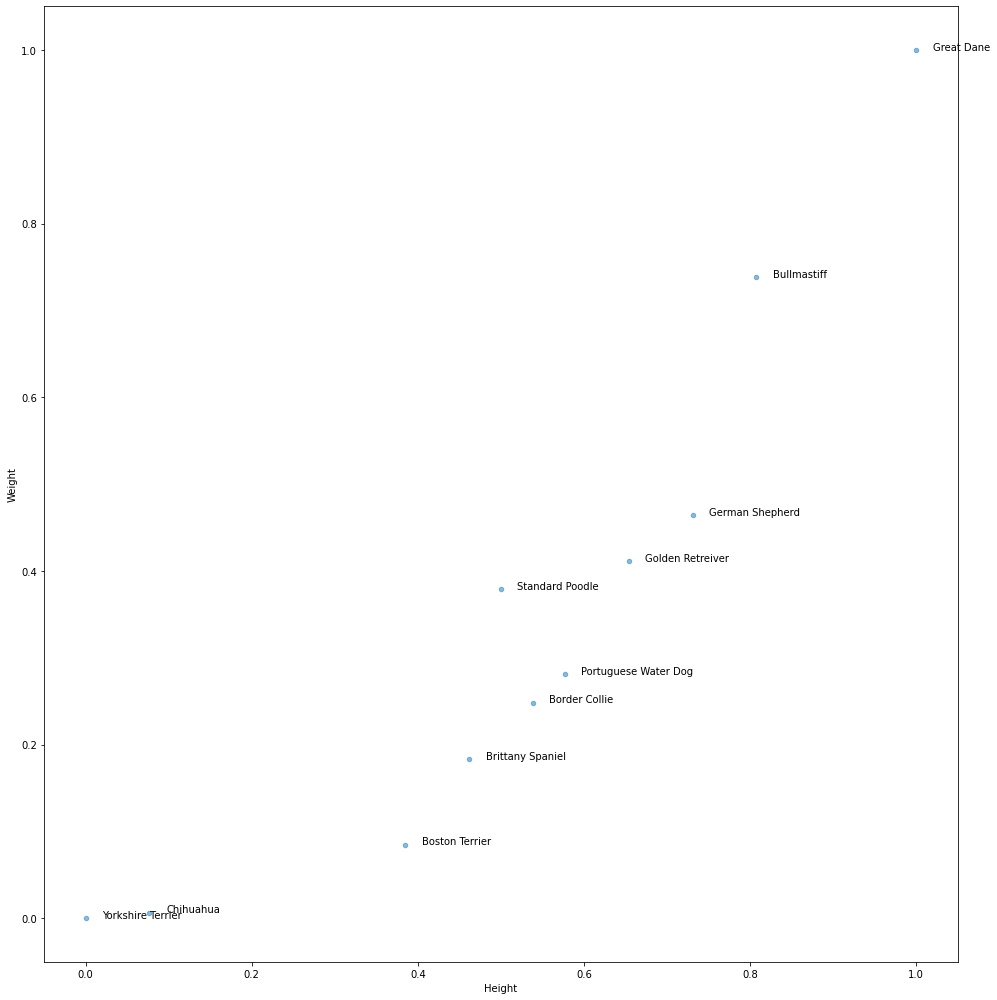

In [12]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [14.00, 14]
plt.rcParams["figure.autolayout"] = True

# Scatter plot
ax = dog_data.plot.scatter(x='Height', y='Weight', alpha=0.5)

# Annotate each data point
for i, txt in enumerate(dog_data.index.values.tolist()):
   ax.annotate(txt, (dog_data.Height.iat[i]+0.02, dog_data.Weight.iat[i]))

plt.show()

Gazing at the scatter plot, it looks like we could group the data into three clusters. There are the 2 data points on the bottom left (*Chihuahua* and *Yorkshire Terrier*) The top right group of two (*Bull Mastiff* and *Great Dane*) and the middle group with all the other breeds. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

##  Now let's compute the Euclidean distance between all the breeds:

This is just for pedagogical reasons --- no need to do this when using sklearn's clustering algorithms!


In [13]:
from scipy.spatial.distance import pdist, squareform
pdist(dog_data)

pairwise = pd.DataFrame(
    squareform(pdist(dog_data)),
    columns = dog_data.index,
    index = dog_data.index
)

pairwise

breed,Border Collie,Boston Terrier,Brittany Spaniel,Bullmastiff,Chihuahua,German Shepherd,Golden Retreiver,Great Dane,Portuguese Water Dog,Standard Poodle,Yorkshire Terrier
breed,,,,,,,,,,,
Border Collie,0.000000,0.224428,0.100941,0.559265,0.521056,0.288969,0.200032,0.882027,0.050470,0.136260,0.592981
Boston Terrier,0.224428,0.000000,0.124615,0.778576,0.317531,0.513350,0.423417,1.102716,0.274643,0.315941,0.393889
Brittany Spaniel,0.100941,0.124615,0.000000,0.654572,0.423168,0.389194,0.298852,0.978478,0.151411,0.199815,0.496497
Bullmastiff,0.559265,0.778576,0.654572,0.000000,1.034353,0.285084,0.361200,0.324549,0.512421,0.473179,1.094459
Chihuahua,0.521056,0.317531,0.423168,1.034353,0.000000,0.798020,0.705018,1.356113,0.570400,0.563726,0.077200
German Shepherd,0.288969,0.513350,0.389194,0.285084,0.798020,0.000000,0.093012,0.599771,0.239082,0.245914,0.865661
Golden Retreiver,0.200032,0.423417,0.298852,0.361200,0.705018,0.093012,0.000000,0.682527,0.151673,0.157279,0.772700
Great Dane,0.882027,1.102716,0.978478,0.324549,1.356113,0.599771,0.682527,0.000000,0.834200,0.797205,1.414214
Portuguese Water Dog,0.050470,0.274643,0.151411,0.512421,0.570400,0.239082,0.151673,0.834200,0.000000,0.124615,0.641737


### Hierarchical Clustering step by step

### Step 1.
Initially, each breed is in its own cluster. We find the two closest clusters and combine them
into one cluster. From the table above we see that the closest clusters are the
Border Collie and the Portuguese Water Dog (distance of 0.050470) so we combine them

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro1.png)

### Step 2. 
We find the two closest clusters and combine them into one cluster. From the table on the
preceding page we see that these are the Chihuahua and the Yorkshire Terrier (distance of
0.077200) so we combine them. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro2.png)

### Step 3.
We repeat the process again. This time combining the German Shepherd and the Golden
Retriever.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro3.png)

### Step 4.

We repeat the process yet again. From the table we see that the next closest pair is the Border
Collie and the Brittany Spaniel. The Border Collie is already in a cluster with the Portuguese
Water Dog which we created in Step 1. So in this step we are going to combine that cluster
with the Brittany Spaniel.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro4.png)

### Step 5.
And we continue ...

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dendro5.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/borderCollie.png)


## Hierarchical Clustering in sklearn

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/doodle.png)

Here is how to do hierarchical clustering in sklearn ...


In [15]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
clusterer.fit_predict(dog_data)


array([0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2])

And let's draw the dendrogram ...

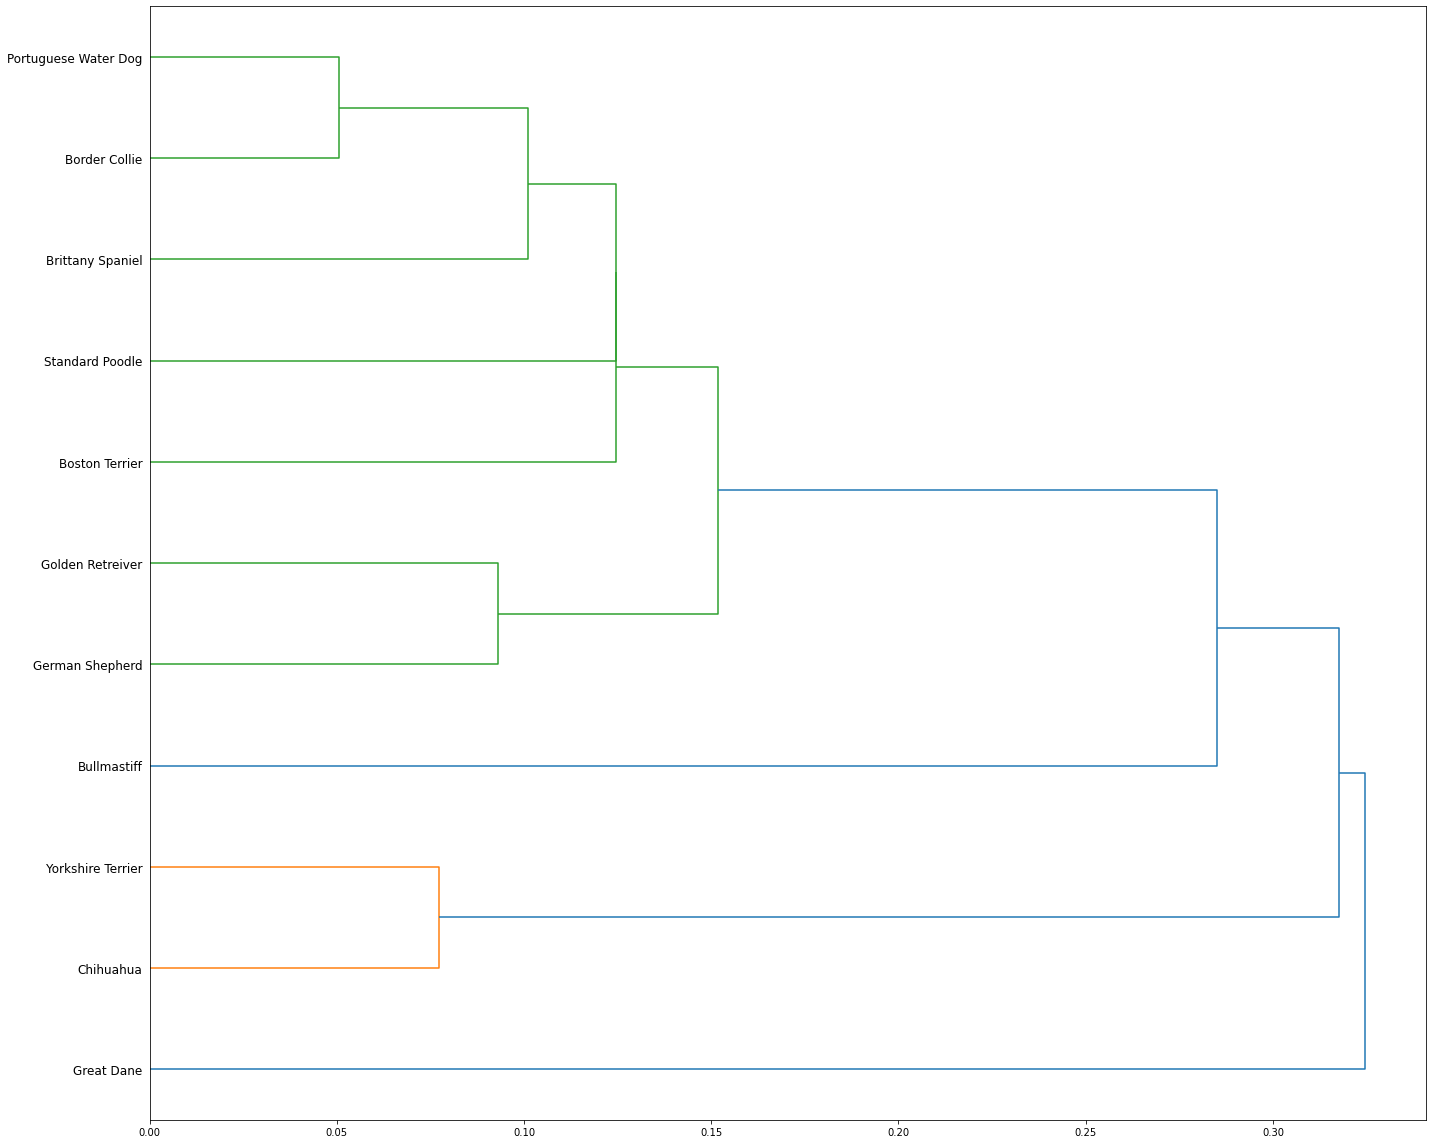

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dog_data, method='single'), labels = dog_data.index, orientation = 'right')


### Let's disect this

Let's take a closer look at the parameters for AgglomerativeClustering `AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)`

`affinity='euclidean'` simply means to use the Euclidean distance. The options for affinity are `manhattan` and `cosine` among others. The default is euclidean.

`linkage='ward'` describes how we decide what clusters to join. The options are:


* `ward` minimizes the variance of the clusters being merged. (the default)
* `average` uses the average of the distances of each observation of the two sets.
* `complete` or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
* `single` uses the minimum of the distances between all observations of the two sets.

You'll notice that when we drew the dendrogram we used single linkage because it matched the explanation above. In general, it is good to use the default ward linkage.

`n_clusters=3` specifies how many clusters to create. In this case we instruct the algorithm to create 3 clusters. Let's do a scatter plot of those clusters:


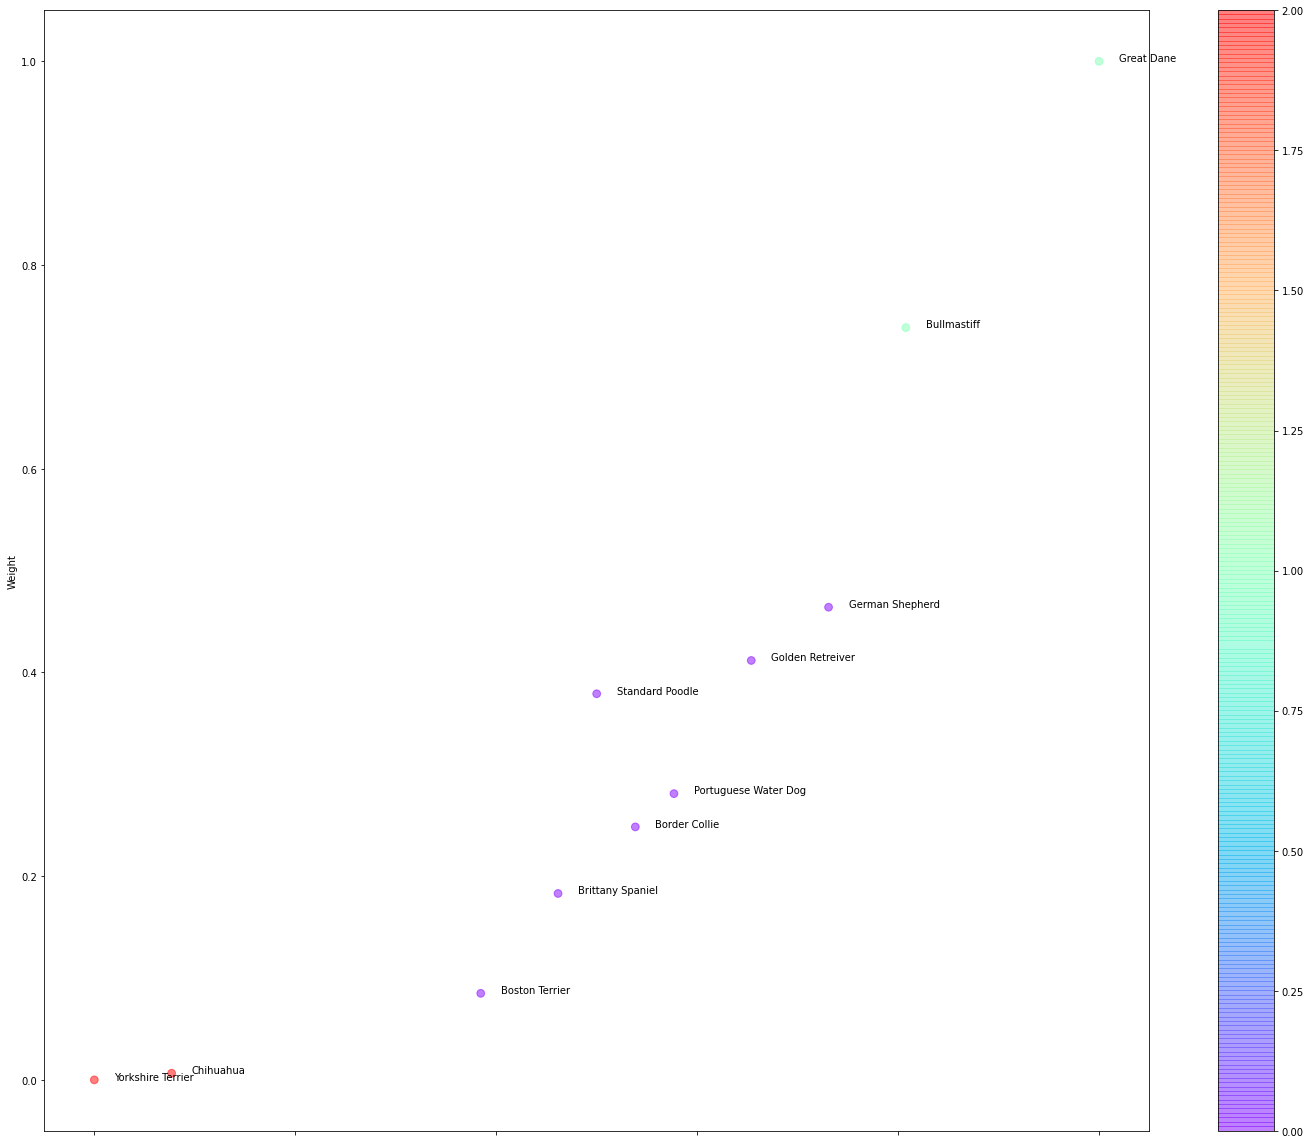

In [17]:
plt.rcParams["figure.figsize"] = [20.00, 16]
plt.rcParams["figure.autolayout"] = True
#ax = plt.scatter(x=dog_data['Height'], y=dog_data['Weight'], c= clusterer.labels_, cmap='rainbow' )
ax = dog_data.plot.scatter(x='Height', y='Weight', alpha=0.5, c= clusterer.labels_, cmap='rainbow', s=60)
for i, txt in enumerate(dog_data.index.values.tolist()):
   ax.annotate(txt, (dog_data.Height.iat[i]+0.02, dog_data.Weight.iat[i]))

plt.show()

So the Yorkshire Terrier and Chihuahua are in a cluster by themselves as is the Bullmastiff and the Great Dane. The remainder of the dog breeds are in the third cluster.



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

# k means clustering


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/kmeans1.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/kmeans2.png)

The basic k-means algorithm is 

1. select k random instances to be the
initial centroids
2. REPEAT
3. assign each instance to the nearest
centroid. (forming k clusters)
4. update centroids by computing mean
of each cluster
5. UNTIL centroids don’t change (much).

Let’s go through an example. Consider the following points (x and y coordinates):

Let's divide our dog dataset into 3 clusters

In [18]:
points = pd.DataFrame({'x':[1,1, 2, 2, 4, 4, 5, 5], 'y':[2,4,2,3,2,4,1,3]})
points

,x,y
0,1,2
1,1,4
2,2,2
3,2,3
4,4,2
5,4,4
6,5,1
7,5,3


Say we want to cluster these into 2 groups.

**step 1 of above algorithm: select k random instances to be initial centroids.**

Suppose we randomly select (1, 4) as centroid 1 and (4, 2) as centroid 2.

**step 3: assign each instance to the nearest centroid**
To assign each instance to the nearest centroid we can use any of the distance measures we
have previously discussed. To keep things simple, for this example let’s use Manhattan
Distance. 

In [20]:
import numpy as np
points['CentOneDist'] = np.abs(points['x'] - 1) + np.abs(points['y'] - 4)
points['CentTwoDist'] = np.abs(points['x'] - 4) + np.abs(points['y'] - 2)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,2,3
1,1,4,0,5
2,2,2,3,2
3,2,3,2,3
4,4,2,5,0
5,4,4,3,2
6,5,1,7,2
7,5,3,5,2


Based on these distances we assign the points to the following clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster1.png)

step 4: update centroids
We compute the new centroids by computing the mean of each cluster. The mean x
coordinate of cluster 1 is:
(1 + 1 + 2) / 3 = 4/3 = 1.33
and the mean y is
(2 + 4 + 3) / 3 = 9/3 = 3
So the new cluster 1 centroid is (1.33, 3).
The new centroid for cluster 2 is (4, 2.4)

**step 5: until centroids don’t change**

The old centroids were (1, 4) and (4, 2) and the new ones are (1.33, 3) and (4, 2.4). The
centroids changed so we repeat.

**step 3: assign each instance to the nearest centroid**

Again we compute Manhattan Distance. 

In [21]:
points['CentOneDist'] = np.abs(points['x'] - 1.33) + np.abs(points['y'] - 3)
points['CentTwoDist'] = np.abs(points['x'] - 4) + np.abs(points['y'] - 2.4)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,1.33,3.4
1,1,4,1.33,4.6
2,2,2,1.67,2.4
3,2,3,0.67,2.6
4,4,2,3.67,0.4
5,4,4,3.67,1.6
6,5,1,5.67,2.4
7,5,3,3.67,1.6


and based on these distances assign the points to clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster2.png)

**step 4: update centroids**

We compute the new centroids by computing the mean of each cluster.
* Cluster 1 centroid: (1.5, 2.75)
* Cluster 2 centroid: (4.5, 2.5)

**step 5: until centroids don’t change**
The centroids changed so we repeat.

**step 3: assign each instance to the nearest centroid**
Again we compute Manhattan Distance. 

In [22]:
points['CentOneDist'] = np.abs(points['x'] - 1.5) + np.abs(points['y'] - 2.75)
points['CentTwoDist'] = np.abs(points['x'] - 4.5) + np.abs(points['y'] - 2.5)
points

,x,y,CentOneDist,CentTwoDist
0,1,2,1.25,4.0
1,1,4,1.75,5.0
2,2,2,1.25,3.0
3,2,3,0.75,3.0
4,4,2,3.25,1.0
5,4,4,3.75,2.0
6,5,1,5.25,2.0
7,5,3,3.75,1.0


and based on these distances assign the points to clusters:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster3.png)

**step 4: update centroids**

We compute the new centroids by computing the mean of each cluster.
Cluster 1 centroid: (1.5, 2.75)
Cluster 2 centroid: (4.5, 2.5)

**step 5: until centroids don’t change**

The updated centroids are identical to the previous ones so the algorithm converged on a
solution and we can stop. The final clusters are

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/cluster4.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/centroidText.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/centroidGood.png)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/CentroidSimple.png)

# Hill Climbing

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill1.png)

I would like to briefly interrupt our
discussion of K-means clustering to talk
about hill climbing algorithms. Suppose our
goal is to reach the peak of some mountain
and we come up with the following
algorithm:

```
start at some random location on the mountain.
REPEAT
 take a step in the direction that will take you higher.
UNTIL there is no direction that will take you higher.
```

This seems like a reasonable algorithm.
Consider using it with the mountain shown here

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill2.png)

You can see that regardless of where we are plopped
down on the mountain, we will reach the peak if we
follow the algorithm.
And if we think of this as a graph, we will reach the
peak value regardless of where we start on the graph.

Now let’s consider using the algorithm with the following graph

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill3.png)

Thus, this simple version of the hill-climbing algorithm is not guaranteed to reach the
optimal solution.
![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill4b.png)


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/Hill5.png)


## SSE or Scatter

To determine the quality of a set of clusters we can use the sum of the squared error
(SSE). This is also called scatter. Here is how to compute it: for each point we will square
the distance from that point to its centroid, then add all those squared distances together.
More formally, 

$$SSE=\sum_{i=1}^{k}\sum_{x∈C_i}{dist(c_i,x)^2}$$

Let’s dissect that. In the first summation sign we are iterating over the clusters. So initially i
equals cluster 1, then i equals cluster 2, up to i equals cluster k. The next summation sign
iterates over the points in that cluster—something like, for each point x in cluster i. Dist is
whatever distance formula we are using (for example, Manhattan, or Euclidean). So we
compute the distance between that point, x, and the centroid for the cluster ci, square that
distance and add it to our total. 

Let’s say we run our k-means algorithm twice on the same data and for each run we pick a
different set of random initial centroids. Is the set of clusters that were computed during the
first run worse or better than the set computed during the second run? To answer that
question we compute the SSE for both sets of clusters. The set with the smaller SSE is the
better of the two.

# k-means in sklearn

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, ).fit(dog_data)
labels = kmeans.labels_

The variable `labels` is an array the specifies which group each dog belongs to:

In [25]:
labels

array([2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0], dtype=int32)

My results were:

    array([0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

which indicates that the first, second, and third dogs are in group 0, the next one in group 1 and so on  That may be helpful for future computational tasks but is not the helpful if we are trying to visualize the data. Let me munge that a bit into a slightly more useful form:

In [26]:
groups = {0: [], 1: [], 2: []}
i = 0
for index, row in dog_data.iterrows():
    groups[labels[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for breed in value:
        print("    %s" % breed)
    print('\n')

CLUSTER 0
    Chihuahua
    Yorkshire Terrier


CLUSTER 1
    Bullmastiff
    Great Dane


CLUSTER 2
    Border Collie
    Boston Terrier
    Brittany Spaniel
    German Shepherd
    Golden Retreiver
    Portuguese Water Dog
    Standard Poodle




keep in mind that since they initial centroids are selected somewhat randomly it is possible that you get a different answer than I do. The answer I got was:

    CLUSTER 0
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
    

    CLUSTER 1
        Bullmastiff
        Great Dane


    CLUSTER 2
        Chihuahua
        Yorkshire Terrier




![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 
## <font color='#EE4C2C'>1. Breakfast Cereals</font> 

I would like you to create 4 clusters of the data in:

    https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv
    
For clustering use the features calories, sugar, protein, and fiber.

Print out the results as we did for the dog breed data:


    CLUSTER 0
    Bullmastiff
    Great Dane
    

    CLUSTER 1
        Chihuahua
        Yorkshire Terrier
    

    CLUSTER 2
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
        
Because the initial centroids are random, by default the sklearn kmeans agorithm runs the algorithm 10 times and picks the best results (based on some of squares error). I would like you to change that parameter so it runs the algorithm 100 times.   Just google `sklearn kmeans` to get documentation on the parameters.

In [20]:
import pandas as pd
cereals = pd.read_csv('https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv')
cereals

,Name,Calories,Protein,Fat (g),Sodium (mg),dietary fiber (g),carbohydrates (g),sugar,Potassium,Vitamins
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3,60,25
73,Trix,110,1,1,140,0.0,13.0,12,25,25
74,Wheat Chex,100,3,1,230,3.0,17.0,3,115,25
75,Wheaties,100,3,1,200,3.0,17.0,3,110,25


In [21]:
cereals.columns.values

array(['Name', 'Calories', 'Protein', 'Fat (g)', 'Sodium (mg)',
       'dietary fiber (g)', 'carbohydrates (g)', 'sugar', 'Potassium',
       'Vitamins'], dtype=object)

In [24]:
cereals = cereals.rename(mapper={'dietary fiber (g)': 'fiber'}, axis=1)
cereals

,Name,Calories,Protein,Fat (g),Sodium (mg),fiber,carbohydrates (g),sugar,Potassium,Vitamins
0,100% Bran,0.181818,0.6,1,130,0.714286,5.0,0.4375,280,25
1,100% Natural Bran,0.636364,0.4,5,15,0.142857,8.0,0.5625,135,0
2,All-Bran,0.181818,0.6,1,260,0.642857,7.0,0.3750,320,25
3,All-Bran with Extra Fiber,0.000000,0.6,0,140,1.000000,8.0,0.0625,330,25
4,Almond Delight,0.545455,0.2,2,200,0.071429,14.0,0.5625,-1,25
...,...,...,...,...,...,...,...,...,...,...
72,Triples,0.545455,0.2,1,250,0.000000,21.0,0.2500,60,25
73,Trix,0.545455,0.0,1,140,0.000000,13.0,0.8125,25,25
74,Wheat Chex,0.454545,0.4,1,230,0.214286,17.0,0.2500,115,25
75,Wheaties,0.454545,0.4,1,200,0.214286,17.0,0.2500,110,25


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cereals[['Calories', 'Protein', 'sugar', 'fiber']]= scaler.fit_transform(cereals[['Calories', 'Protein', 'sugar', 'fiber']])
cereal_features = cereals[['Calories', 'Protein', 'sugar', 'fiber']]
cereal_features

,Calories,Protein,sugar,fiber
0,0.181818,0.6,0.4375,0.714286
1,0.636364,0.4,0.5625,0.142857
2,0.181818,0.6,0.3750,0.642857
3,0.000000,0.6,0.0625,1.000000
4,0.545455,0.2,0.5625,0.071429
...,...,...,...,...
72,0.545455,0.2,0.2500,0.000000
73,0.545455,0.0,0.8125,0.000000
74,0.454545,0.4,0.2500,0.214286
75,0.454545,0.4,0.2500,0.214286


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100).fit(cereal_features)
labels = kmeans.labels_

In [37]:
labels

array([1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0], dtype=int32)

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. Hierarchical</font> 

I would like you to use the hierarchical clustering algorithm on the cereal data. Plot the dendrogram. 


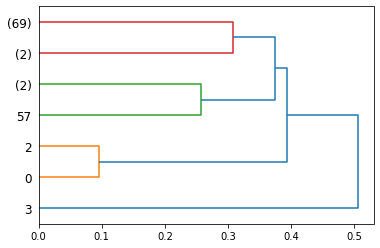

In [42]:
# TO DO
import scipy.cluster.hierarchy as sch

cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster.fit_predict(cereal_features)
dendrogram = sch.dendrogram(sch.linkage(cereal_features, method='single'), labels = cereal_features.index, orientation ='right', p=3, truncate_mode='level')

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>Fighting Poverty</font> 
## <font color='#EE4C2C'>(bonus possible based on quality of work)</font> 



### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
[HELP International's](https://help-international.org/) hmission is to fight poverty and empower people. Even though it has millions of dollars of funds, it is a tiny amount compared to the needs of the countries of the world. HELP needs to decide how to use this money strategically and effectively by selecting countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


Specifically, you need to

* determine what columns are relevant for this task 
* cluster the countries (you decide how many clusters)
* create a choropleth map showing the clusters
* determine the cluster representing countries of greatest need.
* list the countries with the greatest need.

Use whatever methods and hyperparameters you want. 

The [dataset](https://raw.githubusercontent.com/zacharski/ml-class/master/data/Country-data.csv) countains 10 measures for each of 167 countries:

| Column Name | Description |
| :--- | :--- |
country|Name of the country
child_mort|Death of children under 5 years of age per 1000 live births
exports|Exports of goods and services per capita. Given as %age of the GDP per capita
health|Total health spending per capita. Given as %age of GDP per capita
imports|Imports of goods and services per capita. Given as %age of the GDP per capita
Income|Net income per person
Inflation|The measurement of the annual growth rate of the Total GDP
life_expec|The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer|The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp|The GDP per capita. Calculated as the Total GDP divided by the total population.

### Choropleth Map
A choropleth map allows us to visualize how a variable varies across a geographic area. There is a python library that helps us create one. 

Here is a quick example,


In [43]:
countries = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/Country-data.csv')
countries[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [44]:
countries.isna().sum().sum()

0

In [45]:
countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [47]:
countries[['child_mort', 'health', 'life_expec','income']] = scaler.fit_transform(countries[['child_mort', 'health', 'life_expec', 'income']])

In [51]:
country_features = countries[['child_mort', 'health', 'life_expec','income']]
kmeans = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')

In [52]:
kmeans.fit_predict(country_features)

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 0, 2, 2, 0, 3, 2, 3, 2, 3, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       3, 3, 0, 0, 3, 1, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 3, 0, 0, 2, 3, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 0])

In [53]:
import plotly.express as px

fig = px.choropleth(countries,
                    locationmode='country names',
                    locations='country',
                    color='life_expec',
                    title='Coutries by Life Expectancy'
                   )
fig.show()